# Visualizations 

Encoding: 

<p> C2 - 
    * 0: <60     
    * 1: >60 
<p> C4 - 
    * 0: <23     
    * 1: <60      
    * 2: <93      
    * 3: >93  
<p> C1 - 1 for each number from 0 to 101



In [3]:
# IMPORTS 
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
import time 

In [4]:
def c2(df, rv=1):
    if rv == 1:
        if( df < 60 ):                  return [1,0]  
        elif( df >= 60 ):               return [0,1]      
    elif rf==2: 
        if( df < 60 ):                  return 0
        elif( df >= 60 ):               return 1
def c4(df, rv=1):
    
    if rv == 1:
        if( df < 23 ):                  return [1,0,0,0]  #0
        elif( df >= 23 and df < 60 ):   return [0,1,0,0]  #1
        elif( df >= 60 and df < 93 ):   return [0,0,1,0]  #2
        elif( df >= 93 ):               return [0,0,0,1]  #3    
    elif rv==2: 
        if( df < 23 ):                  return 0
        elif( df >= 23 and df < 60 ):   return 1
        elif( df >= 60 and df < 93 ):   return 2
        elif( df >= 93 ):               return 3
    # elif rf==3: 
    #     if  ( df == [1,0,0,0] ):        return 0 
    #     elif( df == [0,1,0,0] ):        return 1
    #     elif( df == [0,0,1,0] ):        return 2  
    #     elif( df == [0,0,0,1] ):        return 3  
def cN(df):
    global nout
    listofzeros = [0] * nout
    dfIndex = df #//nRange
    # print('{} and {}', (df,dfIndex))
    if    0 < dfIndex < nout:   listofzeros[dfIndex] = 1
    elif  dfIndex < 0:          listofzeros[0]       = 1
    elif  dfIndex >= nout:      listofzeros[nout-1]  = 1
    
    return listofzeros 

def cc(x, rv=1):
    global nout
    if   dType == 'C4':  nout = 4;   return c4(x, rv);
    elif dType == 'C1':  nout = 102; return cN(x); 
    elif dType == 'C2':  nout = 2;   return c2(x, rv);

# Read

In [11]:
start = time.time()
# 1- Get data: 
path = outfile = '../../data/FRFLO/datasc.csv' 
# path = outfile = '../../data/FLALL/datasc.csv' 
dst  =  pd.read_csv( tf.gfile.Open(path), sep=None, skipinitialspace=True,  engine="python")
elapsed_time = float(time.time() - start)
print(elapsed_time)

5.079492568969727


In [29]:
# dst.describe()
dst.info()
# dst.shape 
# dst.isnull().any() 

dst = dst.fillna(0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9610 entries, 0 to 9609
Columns: 1816 entries, M to 998168
dtypes: float64(1814), int64(2)
memory usage: 133.1 MB


# vis Basic

In [5]:
Y  = dst.loc[:,'FP'].as_matrix().tolist()
X  = dst.loc[:, 'M'].as_matrix().tolist()
a = 1
if a == 0: 
    plt.hist(Y)
else: 
    plt.xlabel('M')
    plt.ylabel('FP')
    plt.grid(True)
    N = 2 #50
    colors = np.random.rand(N)
    area = 1 #np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii
    #plt.plot(X, Y, color='blue', marker='o', label='FP Comp')
    #plt.plot(X, Y, 'bo', label='FP Comp')
    plt.scatter(X,Y, s=6, c='b', marker='o', cmap=None, norm=None, vmin=60, vmax=101, alpha=None,  label='FP Comp')
    plt.legend()

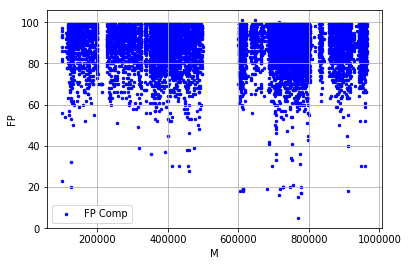

In [6]:
plt.show()

# vis 1 - Single Cx in Formulations.
color - FP - legend <br>
y = Quantity of the comp Cx -- <br>
x = M <br>
<br><br>

clean up - drop the M that does not contain Cx 

In [13]:
#*********************************************************************
# paint 
#*********************************************************************  
def paint_plot(data,  component ,clase,m="o"):
    colors = list()
    palette = {0: "red", 1: "green", 2: "blue"}
    x = data[ data['FPP'] == clase ]["M"]
    y = data[ data['FPP'] == clase ][component]
    plt.scatter(x, y , edgecolors='k',s=50, alpha=0.9, marker=m,label=str(clase))
    
def paint(data, component):
    #color=plt.rainbow(np.linspace(0,1,nn))
    for i in rr: 
        #c=next(color)
        paint_plot(data, component, i)
    plt.legend()
    plt.show()

In [14]:
com = "160102" #c922 - 160102 - 121 dipropylene glycol 
com = "131104" #c738 - 131104 - 44  hexenol cis 3 
com = "100023"
# com = "100025"

In [15]:
# tags_data.isnull().any()
# tags_data.dopna()

In [16]:
# read components file ... 
path = outfile = '../../data/FRFLO/datac.csv' 
# path = outfile = '../../data/FLALL/datasc.csv' 
col_df = pd.read_csv(path, index_col=2, sep=',', usecols=[0,1,2,3])    

In [17]:
# col_df.describe()
# col_df.head()

In [18]:
col_df.loc[int(com)]

cc     c1
tot     3
fp     73
Name: 100023, dtype: object

In [19]:
# encode the FP 
dType = "C4"
if   dType == 'C4':  nn = 4
elif dType == 'C1':  nn = 100
elif dType == 'C2':  nn = 2
rr = range(nn)

# dst.insert(2, 'FPP', dst['FP'].map(lambda x: cc(x)))  
dst["FPP"] = dst['FP'].map(lambda x: cc(x, rv=2))

In [20]:
# drop all the columns except the index, 2 and the com 
dst.columns[2:4]
dstt = dst[["M", "FPP", com]]
dst.head()
dstt = dstt.dropna()
dstt

,M,FPP,100023
5103,714127,3,2.110000e-07
6262,752053,2,3.710000e-06
9572,962547,3,1.500000e-05


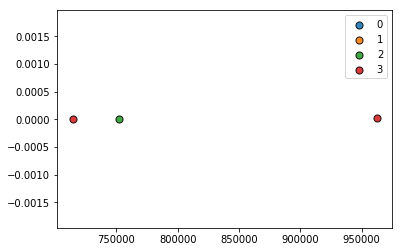

In [14]:
paint(dst, com)

In [16]:
nn

4

# vis 2 - All C
color - FP - legend <br>
y = Cantidad of the c Cx -- <br>
x = Cx <br>
<br><br>
something interesting would be to know what is the amount that is normally use for each component... *dst.describe()d

# exp. 
1. get components used in each formulation 
2. replace this numbers for 1 -> Embeddings

In [30]:
# dst.head()
len(dst[com].nonzero()[0])

3

In [12]:
dst.describe()

,M,FP,100023,100025,100028,100034,100041,100060,100061,100070,...,964392,972612,978488,982437,982440,983685,983686,996041,998063,998168
count,9610.000000,9610.000000,3.000000e+00,17.000000,6.680000e+02,1.940000e+02,219.000000,52.000000,4.000000,3.820000e+02,...,2.000000,3.000000e+00,1.340000e+02,188.000000,3.000000,63.000000,67.000000,1.000,1.800000e+01,1.000
mean,601962.775963,87.214256,6.307000e-06,0.000797,5.443630e-04,5.639133e-04,0.005630,0.000631,0.000474,4.026940e-04,...,0.006761,2.169000e-11,5.467359e-04,0.390481,0.000419,0.003023,0.000618,0.075,7.924552e-04,0.001
std,242149.031945,10.047519,7.728967e-06,0.000373,1.941300e-03,2.434424e-03,0.006617,0.000638,0.000109,4.481518e-03,...,0.000723,3.750758e-11,2.247094e-03,0.167917,0.000212,0.011062,0.000905,NaN,1.766641e-03,NaN
min,100456.000000,5.000000,2.110000e-07,0.000005,1.000000e-14,3.570000e-10,0.000050,0.000014,0.000364,2.100000e-12,...,0.006250,0.000000e+00,1.260000e-12,0.082000,0.000294,0.000011,0.000039,0.075,1.200000e-11,0.001
25%,394230.000000,82.000000,1.960500e-06,0.000528,5.250000e-05,5.000000e-07,0.001464,0.000256,0.000432,5.700000e-07,...,0.006506,3.500000e-14,1.515000e-06,0.253300,0.000297,0.000465,0.000200,0.075,3.800000e-06,0.001
50%,704052.000000,89.000000,3.710000e-06,0.001000,1.764710e-04,3.725000e-06,0.003182,0.000455,0.000455,8.715000e-06,...,0.006761,7.000000e-14,1.835000e-05,0.387500,0.000300,0.001250,0.000375,0.075,6.400000e-06,0.001
75%,777086.750000,95.000000,9.355000e-06,0.001000,5.000000e-04,1.025860e-04,0.007314,0.000700,0.000497,6.670000e-05,...,0.007017,3.253500e-11,1.040000e-04,0.530500,0.000482,0.002034,0.000500,0.075,4.411135e-04,0.001
max,963939.000000,101.000000,1.500000e-05,0.001111,4.285714e-02,3.000000e-02,0.047059,0.002857,0.000625,8.571429e-02,...,0.007273,6.500000e-11,1.500000e-02,0.729500,0.000664,0.088571,0.005000,0.075,7.001520e-03,0.001


In [33]:
total = len(dst)
com = "100023"
# dst[com].describe()
# dst[com].isnull().any() 
null = total - len(dst[com].nonzero()[0]) #for zeros 
# null = sum(pd.isnull(dst[com]))   # for null NA
print( "total = {} and com: {} = {} null  ".format(total,com, null))

total = 9610 and com: 100023 = 9607 null  


In [10]:
com = "160102" #c922 - 160102 - 121 dipropylene glycol 
com = "131104" #c738 - 131104 - 44  hexenol cis 3 
com = "100023"
total - sum(pd.isnull(dst[com]))

9610

# Replace amount for 1 - get comp in 1 form 

In [20]:
ds =  dst.iloc[1]
print(len(ds.iloc[ds.nonzero()]))
# print(ds.iloc[ds.nonzero()])
print(*ds.iloc[ds.nonzero()].index)
print(*ds.iloc[ds.nonzero()])


72
M FP 100202 100436 100595 102137 103011 103026 103250 103258 103500 103587 103798 103828 103908 104756 105492 105587 105598 105893 106018 106184 106216 106738 113554 116041 116165 130041 130065 130122 130141 130149 130237 130298 130520 130524 130837 130879 130965 131030 131104 131185 131225 131364 131381 131394 131395 131423 131431 131503 160102 160221 160241 162053 170021 172799 195651 195878 197010 197012 197016 600278 611073 611161 611402 638257 656021 660345 660354 690307 903748 903766
100566.0 81.0 6e-06 0.02 0.003 1.5e-08 0.005 0.04 3.75e-06 0.015 0.003 7.5e-07 3e-05 0.02 0.02 3e-06 7.5e-05 2.25e-08 0.0005 0.01 0.002 0.005200015 2.7e-08 0.0004 0.0012 3e-05 1.2e-07 0.04 9e-07 0.00055 4.5e-08 4.5e-06 0.0002565 9e-06 0.0741 0.0772 0.0004 3e-05 0.03 0.2508 1.5e-06 7.5e-10 2.25e-09 1e-05 0.003 7.5e-08 1.5e-08 8e-05 4e-07 0.0002 0.2877106 6.23e-06 0.0004 9.93e-06 0.019 4.5e-09 1.5e-06 0.0005 0.003 0.0005 0.01 0.005 4.5e-07 1.5e-07 3.75e-06 7.5e-07 5e-05 0.001 0.0001 0.0006 2.5e-05 0

In [46]:
# get the indices of the array where it is not zero
dst.iloc[0].nonzero()
dst = dst.fillna(0)

ds =  dst.iloc[1]
# print(ds) 
print(len(ds.iloc[ds.nonzero()]))
# print(len(ds.iloc[ds.notnull()]))
print(len(ds.nonzero()[0]))
dst.head(10)

72
72


,M,FP,100023,100025,100028,100034,100041,100060,100061,100070,...,964392,972612,978488,982437,982440,983685,983686,996041,998063,998168
0,100456,96,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100566,81,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100645,93,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100669,23,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100683,94,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100688,93,0.0,0.0,0.000333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,100714,56,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100906,82,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100955,88,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,100991,97,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# for i, ds in dst.iterrows():
#     print(len(ds.nonzero()[0]))


In [43]:
# average of comp in form:
def get_form_av0(dst):
    av = 0
    def ave(x):  global av; av += x
    [ ave( len(ds.nonzero()[0]) ) for i, ds in dst.iterrows()]
    print(av/len(dst))

def get_form_av(dst):
    dsv = [ len(ds.nonzero()[0]) for i, ds in dst.iterrows()]
    print("mean: {},  max: {}, min: {} ".format( np.mean(dsv),np.max(dsv), np.min(dsv)  ))

In [51]:
form = 100456
dsf = dst[dst["M"] == form]
get_form_av(dsf)
# get_form_av(dst.loc[0:2] )

mean: 70.0,  max: 70, min: 70 


In [87]:
# test to replace all the decimals for 1. 

pd.isnull(dst[com])
type(pd.notnull(dst[com]))
# pd.notnull(dst[com])

# dst[com][pd.isnull(dst[com]) == False] 
# dst[com][pd.isnull(dst[com]) == False] = 1                               # warning! ??? 
# No warning: # .loc[row_index,col_indexer] = value instead

# pd.isnull(dst.iloc[:,3])
# dst[com][pd.isnull(dst.iloc[:,2]) == False]
# type(dst[com][pd.isnull(dst.iloc[:,2]) == False])
# dst.iloc[dst[com][pd.isnull(dst.iloc[:,2]) == False].index  , 2 ] = 1    # GOOD ONE 

#dst.iloc( [pd.isnull(dst.iloc[:,4]) == False])
# .loc[row_index,col_indexer] = value instead

pandas.core.series.Series

In [ ]:

dsxx = [  ]

